In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
divorce = pd.read_csv('divorce.csv')
print(divorce.info())
print(divorce.isna().sum())
print(divorce.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2209 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB
None
divorce_date           0
dob_man                0
education_man          0
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: i

In [4]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date','dob_man','dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


In [5]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce['marriage_date'])

In [8]:
print(divorce[['num_kids','marriage_year']])

      num_kids  marriage_year
0          1.0           2000
1          NaN           2001
2          2.0           2000
3          NaN           2006
4          NaN           2007
...        ...            ...
2204       NaN           2002
2205       NaN           2002
2206       NaN           2009
2207       NaN           2008
2208       NaN           2009

[2209 rows x 2 columns]


C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


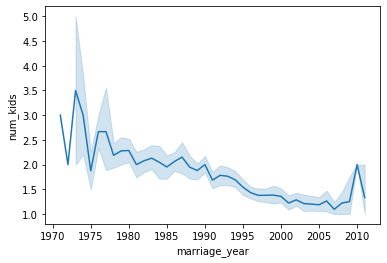

In [9]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()

In [6]:
print(divorce['divorce_date'].min())
print(divorce['divorce_date'].max())

2000-01-08 00:00:00
2015-11-03 00:00:00


In [7]:
divorce.corr()

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


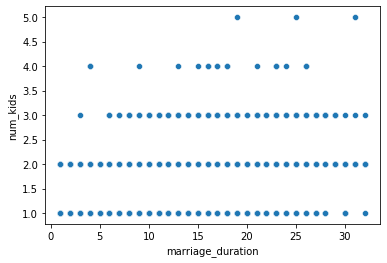

In [8]:
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

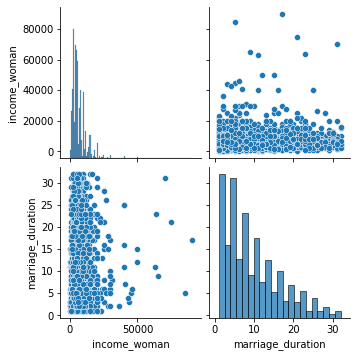

In [9]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars = ['income_woman', 'marriage_duration'])
plt.show()

In [10]:
divorce['education_man'].value_counts()

Professional    1313
Preparatory      501
Secondary        288
Primary          100
None               4
Other              3
Name: education_man, dtype: int64

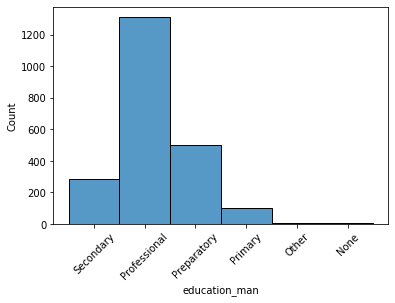

In [11]:
sns.histplot(data=divorce, x='education_man', binwidth = 1)
plt.xticks(rotation=45)
plt.show()

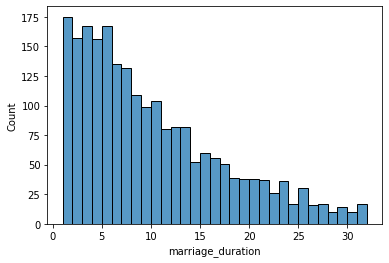

In [12]:
sns.histplot(data=divorce, x='marriage_duration', binwidth = 1)
plt.show()

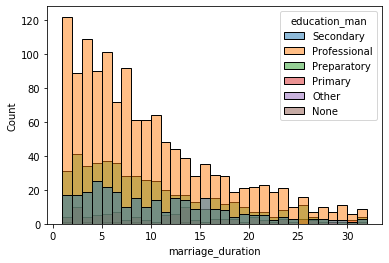

In [13]:
sns.histplot(data=divorce, x='marriage_duration', hue = 'education_man', binwidth = 1)
plt.show()

C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


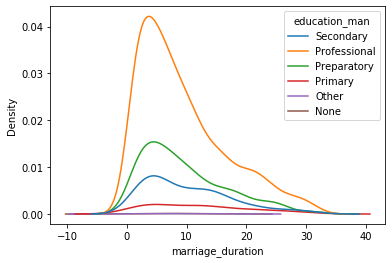

In [14]:
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'education_man')
plt.show()

C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


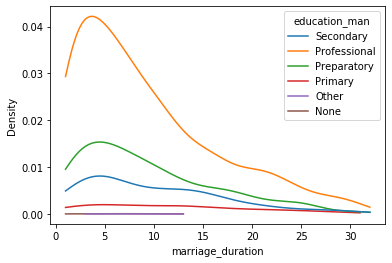

In [15]:
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'education_man', cut = 0)
plt.show()

In [16]:
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
print(divorce[['man_age_marriage','marriage_year','dob_man']]) 

      man_age_marriage  marriage_year    dob_man
0                   25           2000 1975-12-18
1                   25           2001 1976-11-17
2                   31           2000 1969-04-06
3                   27           2006 1979-11-13
4                   25           2007 1982-09-20
...                ...            ...        ...
2204                33           2002 1969-11-27
2205                32           2002 1970-09-17
2206                33           2009 1976-03-11
2207                31           2008 1977-10-29
2208                49           2009 1960-06-22

[2209 rows x 3 columns]


In [17]:
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year
print(divorce['woman_age_marriage'])

0       17
1       24
2       30
3       25
4       19
        ..
2204    27
2205    25
2206    31
2207    30
2208    37
Name: woman_age_marriage, Length: 2209, dtype: int64


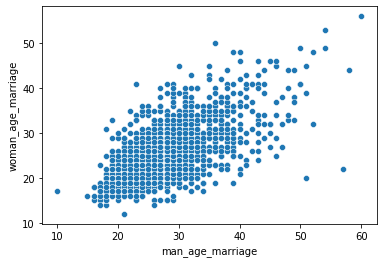

In [18]:
sns.scatterplot(data=divorce, x ='man_age_marriage', y = 'woman_age_marriage')
plt.show()

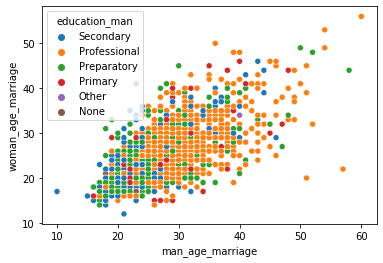

In [19]:
sns.scatterplot(data=divorce, x ='man_age_marriage', y = 'woman_age_marriage', hue = 'education_man')
plt.show()

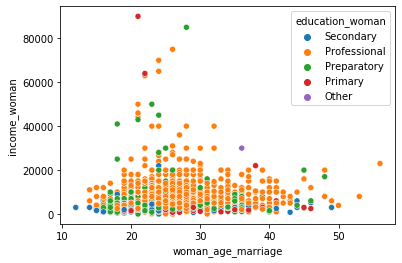

In [20]:
# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\thumt\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


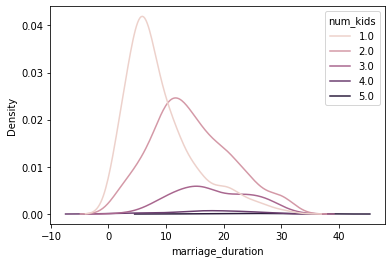

In [21]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'num_kids')
plt.show()

In [22]:
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0)
planes['Destination'].value_counts()

Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: Destination, dtype: int64

In [23]:
planes['Destination'].value_counts(normalize=True)

Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: Destination, dtype: float64

In [24]:
pd.crosstab(planes['Source'], planes['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


In [25]:
salaries = pd.read_csv('Salary_Rupee_USD.csv', index_col = 0)
print(salaries.info())
print(salaries['Job_Category'].value_counts(normalize = True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          407 non-null    int64  
 1   Designation           407 non-null    object 
 2   Experience            407 non-null    object 
 3   Employment_Status     407 non-null    object 
 4   Salary_In_Rupees      407 non-null    float64
 5   Employee_Location     407 non-null    object 
 6   Company_Location      407 non-null    object 
 7   Company_Size          407 non-null    object 
 8   Remote_Working_Ratio  407 non-null    int64  
 9   Salary_USD            407 non-null    float64
 10  Job_Category          407 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 38.2+ KB
None
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial         

In [26]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    EN  EX  MI   SE
Company_Size                 
L             24   7  49   44
M             25   9  58  136
S             18   1  21   15


In [27]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L   M   S
Job_Category                
Data Analytics    23  61   8
Data Engineering  28  72  11
Data Science      38  59  16
Machine Learning  17  19  13
Managerial         5   8   1
Other             13   9   6


In [28]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                  L              M             S
Job_Category                                                
Data Analytics    112851.749217   95912.685246  53741.877000
Data Engineering  118939.035000  121287.060500  86927.136000
Data Science       96489.520105  116044.455864  62241.749250
Machine Learning  140779.491529  100794.236842  78812.586462
Managerial        190551.448800  150713.628000  31484.700000
Other              92873.911385   89750.578667  69871.248000


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object


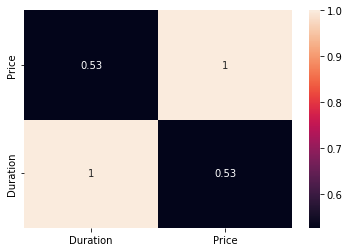

In [29]:
#Generating New Features
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0, parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'])
# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")
# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)
print(planes.dtypes)
ax = sns.heatmap(planes.corr(), annot=True)
ax.set_ylim([0,2])
plt.show()

In [30]:
#remove Nan values
threshold = len(planes) * 0.05
print(threshold)
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

#planes = planes.drop(columns = ['Additional_Info'])

# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)
print('============================================')

# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print(prices_dict)
print('============================================')

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

533.0
Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64
Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline              0
D

In [31]:
print(planes['Total_Stops'].value_counts())
print(planes.info())

1 stop      4467
non-stop    2786
2 stops     1219
3 stops       35
4 stops        1
Name: Total_Stops, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8508 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          8508 non-null   object        
 1   Date_of_Journey  8508 non-null   datetime64[ns]
 2   Source           8508 non-null   object        
 3   Destination      8508 non-null   object        
 4   Route            8508 non-null   object        
 5   Dep_Time         8508 non-null   datetime64[ns]
 6   Arrival_Time     8508 non-null   datetime64[ns]
 7   Duration         8508 non-null   float64       
 8   Total_Stops      8508 non-null   object        
 9   Additional_Info  8208 non-null   object        
 10  Price            8508 non-null   float64       
dtypes: datetime64[ns](3), float64(2), object(6)
memory usage: 797.6+ KB
None


In [32]:
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stop', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop', '0')

planes['Total_Stops'] = planes['Total_Stops'].str.replace(' ', '')
print(planes.head())



       Airline Date_of_Journey    Source Destination                  Route  \
0  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
1       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
2       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   
3     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   
4  Jet Airways      2019-12-03  Banglore   New Delhi        BLR → BOM → DEL   

             Dep_Time        Arrival_Time  Duration Total_Stops  \
0 2023-07-18 09:25:00 2023-10-06 04:25:00     19.00           2   
1 2023-07-18 18:05:00 2023-07-18 23:30:00      5.25           1   
2 2023-07-18 16:50:00 2023-07-18 21:35:00      4.45           1   
3 2023-07-18 09:00:00 2023-07-18 11:25:00      2.25           0   
4 2023-07-18 18:55:00 2023-03-13 10:25:00     15.30           1   

               Additional_Info    Price  
0                      No info  13882.0  
1                      No info   6218.

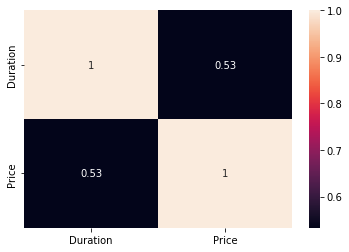

In [33]:
ax = sns.heatmap(planes.corr(), annot=True)

In [34]:
planes['Total_Stops'] = planes['Total_Stops'].astype(int)

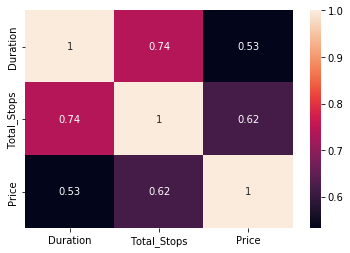

In [35]:
ax = sns.heatmap(planes.corr(), annot=True)

In [36]:
print(planes.dtypes)

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                 int32
Additional_Info            object
Price                     float64
dtype: object


In [37]:
planes['month'] = planes['Date_of_Journey'].dt.month
planes['weekday'] = planes['Date_of_Journey'].dt.weekday
print(planes[['month', 'weekday', 'Date_of_Journey']].head())

   month  weekday Date_of_Journey
0      9        4      2019-09-06
1     12        3      2019-12-05
2      1        3      2019-01-03
3      6        0      2019-06-24
4     12        1      2019-12-03


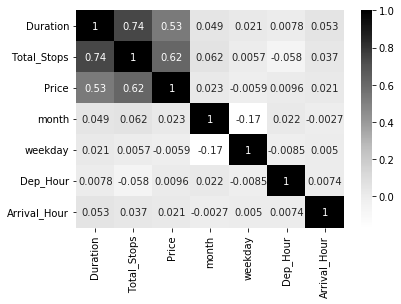

In [51]:
planes['Dep_Hour'] = planes['Dep_Time'].dt.hour
planes['Arrival_Hour'] = planes['Arrival_Time'].dt.hour
sns.heatmap(planes.corr(), annot = True)#, cmap="Greys")
plt.show()

In [39]:
#Creating new features with descriptive statistics.
print(planes['Price'].describe())

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64


In [40]:
twenty_fifth = planes['Price'].quantile(0.25)
median = planes['Price'].median()
seventy_fifth = planes['Price'].quantile(0.75)
maximum = planes['Price'].max()

In [41]:
labels = ['Economy','Premium Economy','Business Class','First Class']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]
planes['Price_Category'] = pd.cut(planes['Price'], labels=labels,bins=bins)
print(planes[['Price', 'Price_Category']].head())

     Price   Price_Category
0  13882.0      First Class
1   6218.0  Premium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class


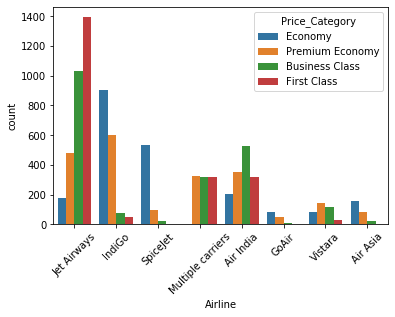

In [42]:
sns.countplot(data=planes, x='Airline', hue='Price_Category')
plt.xticks(rotation = 45)
plt.show()

In [43]:
salaries = pd.read_csv('Salaries_with_date_of_response.csv', index_col = 0, parse_dates=['date_of_response'])
print(salaries.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Designation           407 non-null    object        
 1   date_of_response      407 non-null    datetime64[ns]
 2   Experience            407 non-null    object        
 3   Employment_Status     407 non-null    object        
 4   Salary_In_Rupees      407 non-null    float64       
 5   Employee_Location     407 non-null    object        
 6   Company_Location      407 non-null    object        
 7   Company_Size          407 non-null    object        
 8   Remote_Working_Ratio  407 non-null    int64         
 9   Salary_USD            407 non-null    float64       
 10  Job_Category          407 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 38.2+ KB
None


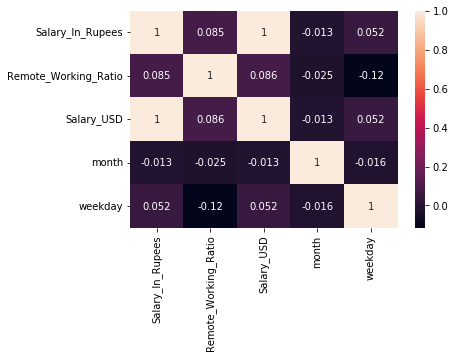

In [44]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(), annot=True)
plt.show()

In [45]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

60880.691999999995 97488.552 143225.1


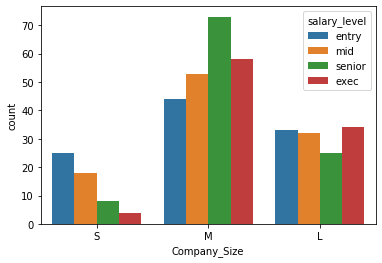

In [46]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

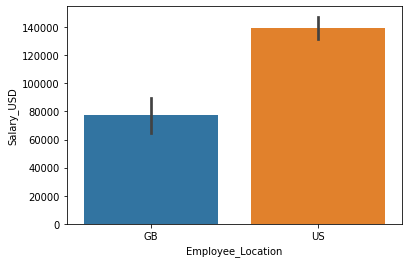

In [47]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb,x="Employee_Location", y="Salary_USD" )
plt.show()

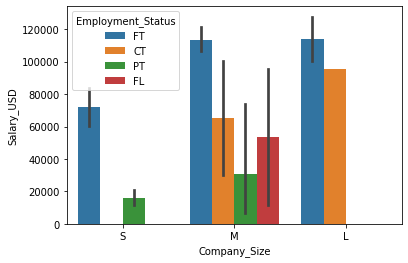

In [48]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, y="Salary_USD", x="Company_Size", hue="Employment_Status")
plt.show()

In [1]:
import scipy

print(scipy.__version__)

1.3.2
